# Running and saving deterministic and stochastic simulations with Tellurium and libRoadRunner 

To facilitate design and comprehension of their models, modelers should use standard systems biology formats for
model descriptions, simulation experiments,


## TOC
* [Introduction](#introduction)
* [Packages and Constants](#model-simulation-packages-and-constants)
* [How does numerical simulation help us model network kinetics?](#numerical-simulation)
* [Specifying a detailed simulation experiment](#specifying-simulation-experiment)
* [Simulating a complex model of a true biological system](#simulating-complex-system)
* [Storing simulation results](#storing-results)
* [Appendix X: ](#model-simulation-appendix)

## Packages and constants <a class="anchor" id="model-simulation-packages-and-constants"></a>

In [3]:
!pip install --upgrade tellurium -q

import tellurium as te # Python-based modeling environment for kinetic models
import roadrunner as rr # High-performance simulation and analysis library
import numpy as np # Scientific computing package
import random # Generate random numbers
import matplotlib.pylab as plt # Additional Python plotting utilities

You should consider upgrading via the '/Users/veronica_porubsky/venv/bin/python -m pip install --upgrade pip' command.


<br>
<div align='center'>
    <figure>
    <img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/tellurium-utilities.png" width="75%" style="padding: 20px">
        <figcaption>Tellurium is an integrated modeling environment which makes available libraries to support biochemical model building and simulation. Reproduced from [cite Tellurium paper/docs].</figcaption>
    </figure>
</div>

## How does numerical simulation help us model network kinetics? <a class="anchor" id="numerical-simulation"></a>

Model simulation involves computational execution of the mathematics describing a model to generate predictions of its
dynamic behavior. We urge modelers to implement numerical methods—such as a custom integration method—separately
from representations of biological systems, so that each of them can be independently reused. When performing stochastic
simulations that use a pseudo-random number generator algo- rithm, preserve a precise definition of the algorithm.
Execute an ensemble of simulation runs with different seeds to estimate the distributions of species population trajectories
and predictions that depend on them. Make the ensembles large enough to accurately characterize properties of the distributions.
Record the seeds used by these simulations or a reproducible methodfor obtaining the seeds. If multiple distinct sets of input parameters are analyzed, repeat the process of estimating the distribution of predictions for each parameter set.

<ul>
  <li>Provides a method to approximate analytical solutions for complex (often non-linear) systems</li>
  <li>Kinetic laws describe the rates of change of species in the system, which can be modeled mathematically</li>
  <li>For a sufficiently large network, simulators must be efficient and perform rapid numerical integration</li>
</ul>


## Specifying a detailed simulation experiment <a class="anchor" id="specifying-simulation-experiment"></a>

It is critical to record all simulation inputs and methods, including initial
conditions, numerical integration algorithms, random number generator
algorithms and seed values when specifying a simulation experiment.
<br>
<br>
Simulation involves computational execution of the
mathematics describing a model to generate predictions of its
dynamic behavior. We urge modelers to implement numerical
methods—such as a custom integration method—separately
from representations of biological systems, so that each of
them can be independently reused. When performing stochastic
simulations that use a pseudo-random number generator algorithm, preserve a precise definition of the algorithm. Execute
an ensemble of simulation runs with different seeds to estimate
the distributions of species population trajectories and predictions that depend on them. Make the ensembles large enough
to accurately characterize properties of the distributions. Record
the seeds used by these simulations or a reproducible method
for obtaining the seeds. If multiple distinct sets of input parameters are analyzed, repeat the process of estimating the distribution of predictions for each parameter set.

Follow the minimum information about & simulation experiment (MIASE) guidelines to determine which software and data to
archive (Waltemath et al., 2011a). The simulation experiment description markup language (SED-ML) can encode simulation
descriptions, including simulator settings and parameter modifications, and facilitate exchange between standard-compatible
tools (Waltemath and Le Novere, 2013). We recommend using the kinetic simulation algorithm ontology (KiSAO) (Courtot
et al., 2011) to annotate SED-ML documents. Many simulators are compatible with these standards, including COPASI and
Java web simulation online (JWS Online), an online platform that hosts models, simulation programs, and data (Olivier and
Snoep, 2004). libRoadRunner provides high-performance simulation of multiple numerical integration algorithms (Somogyi
et al., 2015), and Tellurium provides a Pythonic interface to access libRoadRunner, SED-ML, and additional analysis capabilities (Choi et al., 2018). 

To ensure that published results can be regenerated, archive all
software and data used to produce simulation results that may
be used or referenced in publications. Follow the generic MIASE
(Waltemath et al. (2011a)) guidelines regarding documentation of
model descriptions, simulators, and simulation experiments.
A simulation experiment simulates one or more models. It inputs initial conditions and parameters, and, optionally, perturbations. Perturbations can modify parts of the model or its parameters. A modeler can make a simulation experiment reproducible
without archiving multiple executables by writing a small  program, often called a ‘‘script,’’ that executes all simulations. If
the simulator has an application programming interface (API),
then a script that uses the API can be written to run all simulation
experiments. Strive to store the initial conditions and parameters
used by the script in data files that can be easily understood by
independent investigators. Variations on this approach should
be devised if multiple simulators are required, if some simulators
do not have APIs, or if the simulators depend on incompatible
computing environments. For example, if a simulator does not
have an API, then script could be written to output a sequence
of commands in another script that executes the simulation experiments that use the simulator.

## Simulating a complex model of a true biological system <a class="anchor" id="simulating-complex-system"></a>

Using the model describe in Chapter X, we will demonstrate both deterministic and stochastic simulation studies.

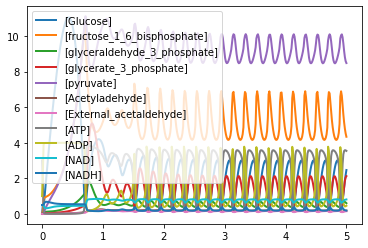

In [2]:
# Wolf model
WOLF_MODEL = "../common/models/Jana_WolfGlycolysis.antimony"

wolf = te.loada(WOLF_MODEL)
data = wolf.simulate(0, 5, 400)
wolf.plot()

## Storing simulation results <a class="anchor" id="storing-results"></a>

Whe nave Structured Unprocessed
Simulation Results and Share the Data Presented in
Graphs and Tables

To allow independent researchers to analyze published simulation results and perform new analyses and mathematical manipulations of the results without requiring that they reproduce the entire model, unprocessed results should be preserved for dissemination. Unprocessed results of simulations that might be used in published findings should be temporarily saved; results that are used in published findings should be archived so they can be shared with independent investigators.

Share the reduced data that are presented in published graphs and tables to enable independent analyses by other investigators. If these data are not shared, researchers must devote substantial effort to transcribe data from figures. Results and data should be stored in structured and space-efficient formats with annotations that clearly describe the data. Unlike traditional figures, interactive graphics provide access to the data presented by mouse over. However, to comprehensively share plotted data, archive formatted files containing the raw data, the graphics files, the code that generated the graphics, and documentation that relates the data to the figures. Providing the source data and the code used to generate the published figures ensures that the figure can be readily regenerated by independent researchers or altered to improve understanding of the data [add references].

While standardized formats, such as the systems biology results
markup language (SBRML) (Dada et al., 2010), have been developed for simulation results, they have not been widely adopted,
leaving opportunities to develop additional standards. The SEEK
platform helps address the challenges of managing model data
by providing a suite of standards-compliant tools that link data
with relevant metadata, facilitate exchange with independent
modelers, and enable web-based simulation and plotting of
experimental data stored on the platform (Wolstencroft et al.,
2015). JWS Online directly links simulation predictions to online
plots that display them and allows modelers to execute real-time
web-based simulation of stored models to visualize interactive
output (Olivier and Snoep, 2004).


Annotate the semantic meaning and provenance of all simulation
results. Save results in computer-readable formats, such as
comma-separated values (CSV) or tab-separated values (TSV).
The hierarchical data format (HDF) offers structured and efficient
data storage that is especially useful for large datasets (Brown
et al., 1993), and RightField provides semantic data annotation
features in excel spreadsheets (Wolstencroft et al., 2011). Export
interactive graphics using MATLAB figures or web-based frameworks, such as Vega and D3.

## Appendix X: <a class="anchor" id="model-simulation-appendix"></a>

<br>
<html>
   <body>
      <h2>Bibliography</h2>
      <ol>
         <li>
            <p>K. Choi et al., <cite>Tellurium: An extensible python-based modeling environment for systems and synthetic biology</cite>, Biosystems, vol. 171, pp. 74–79, Sep. 2018.</p>
         </li>
         <li>
            <p>E. T. Somogyi et al., <cite>libRoadRunner: a high performance SBML simulation and analysis library.,</cite>, Bioinformatics, vol. 31, no. 20, pp. 3315–21, Oct. 2015.</p>         
          <li>
            <p>L. P. Smith, F. T. Bergmann, D. Chandran, and H. M. Sauro, <cite>Antimony: a modular model definition language</cite>, Bioinformatics, vol. 25, no. 18, pp. 2452–2454, Sep. 2009.</p>
         </li>
         <li>
            <p>K. Choi, L. P. Smith, J. K. Medley, and H. M. Sauro, <cite>phraSED-ML: a paraphrased, human-readable adaptation of SED-ML</cite>, J. Bioinform. Comput. Biol., vol. 14, no. 06, Dec. 2016.</p>
         </li>
         <li>
            <p>J. Wolf, H. Y. Sohn, R. Heinrich, and H. Kuriyama, <cite>Mathematical analysis of a mechanism for autonomous metabolic oscillations in continuous culture of Saccharomyces cerevisiae</cite>, FEBS Lett., vol. 499, no. 3, pp. 230–234, Jun. 2001.</p>
         </li>
      </ol>
   </body>
</html>